<a href="https://colab.research.google.com/github/gianerr/CSST-102/blob/main/3B_PLATA_EXER2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Data Exploration and Preprocessing

# 1. Load and Explore the Data
There are 569 instances and 32 features in the dataset. Some characteristics of a tumor measurements include radius, perimeter, area, and etc. There are no missing values in the dataset. The features that have the highest variance are the area_worst, area_mean, area_se, and perimeter_worst. These features are important for distinguishing between malignant and beinign tumors based on their high variance.

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
data = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [79]:
missing_values = data.isnull().sum()
print(missing_values)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [80]:
descriptive_stats = data.describe()
print("Descriptive statistics: ", descriptive_stats)

Descriptive statistics:                   id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.0140

In [81]:
numeric_data = data.select_dtypes(include=np.number)
feature_variance = numeric_data.var()
print("Feature variances: ", feature_variance)

Feature variances:  id                         1.563015e+16
radius_mean                1.241892e+01
texture_mean               1.849891e+01
perimeter_mean             5.904405e+02
area_mean                  1.238436e+05
smoothness_mean            1.977997e-04
compactness_mean           2.789187e-03
concavity_mean             6.355248e-03
concave points_mean        1.505661e-03
symmetry_mean              7.515428e-04
fractal_dimension_mean     4.984872e-05
radius_se                  7.690235e-02
texture_se                 3.043159e-01
perimeter_se               4.087896e+00
area_se                    2.069432e+03
smoothness_se              9.015114e-06
compactness_se             3.207029e-04
concavity_se               9.111982e-04
concave points_se          3.807242e-05
symmetry_se                6.833290e-05
fractal_dimension_se       7.001692e-06
radius_worst               2.336022e+01
texture_worst              3.777648e+01
perimeter_worst            1.129131e+03
area_worst          

In [82]:
highest_variance_features = feature_variance.nlargest(5)
print("Features with highest variance: ", highest_variance_features)

Features with highest variance:  id                 1.563015e+16
area_worst         3.241674e+05
area_mean          1.238436e+05
area_se            2.069432e+03
perimeter_worst    1.129131e+03
dtype: float64


# 2. Preprocessing

In [83]:
data = data.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

In [84]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [85]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [86]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [88]:
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Training data shape: (455, 30), Testing data shape: (114, 30)


# Exercise 2: Implementing the K-Nearest Neighbors (KNN) Model

# 1. Train the KNN Classifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [90]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


In [92]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[68  3]
 [ 3 40]]


# 2. Experiment with Different Values of n_neighbors:

In [93]:
neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy for n_neighbors={n}: {accuracy:.2f}")

Accuracy for n_neighbors=3: 0.95
Accuracy for n_neighbors=5: 0.95
Accuracy for n_neighbors=7: 0.95
Accuracy for n_neighbors=9: 0.96


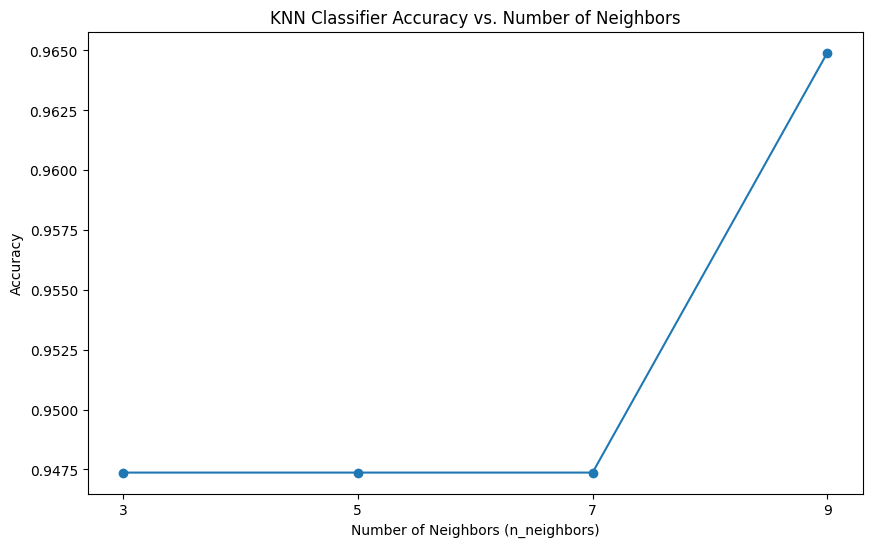

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracies, marker='o')
plt.title('KNN Classifier Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.show()

In [95]:
optimal_n_neighbors = neighbors[accuracies.index(max(accuracies))]
print(f"The optimal value of n_neighbors is: {optimal_n_neighbors}")

The optimal value of n_neighbors is: 9


# Exercise 3: Implementing Logistic Regression

# 1. Train Logistic Regression:

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [97]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [98]:
y_pred = lr.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [100]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[70  1]
 [ 2 41]]


In [101]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# 2. Comparison of KNN and Logistic Regression

The KNN classifier provides higher accuracy and F1-score than those obtained with Logistic Regression, according to the figures.
In the case of the KNN classifier, it achieved an accuracy of 0.9649 with an F1-score of 0.9651. Logistic Regression proved to be another classifier, scoring an accuracy of 0.9474 and F1-score of 0.9474.

# Exercise 4: Hyperparameter Tuning and Cross-Validation

# 1. GridSearchCV for KNN:

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [103]:
 param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
 grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
 grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [104]:
 print(grid_search.best_params_)
 print(grid_search.best_score_)

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9648351648351647


# 2. Cross-Validation for Logistic Regression:

In [105]:
cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='accuracy')

print(f"Cross-Validated Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-Validated Accuracy: 0.98 ± 0.01


# Exercise 5: Decision Boundary Visualization

In [106]:
from sklearn.decomposition import PCA

In [107]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [108]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [109]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [110]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [111]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [118]:
grid_points = np.c_[xx.ravel(), yy.ravel()]

In [122]:
grid_points_original_space = pca.inverse_transform(grid_points)
Z_knn = knn.predict(grid_points_original_space)
Z_knn = Z_knn.reshape(xx.shape)

In [123]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Principal Component 2')

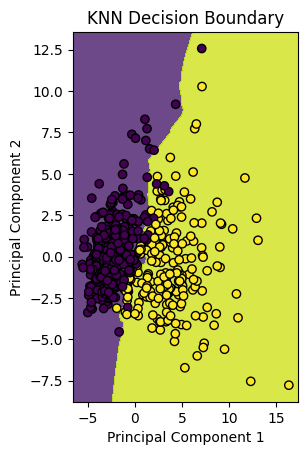

In [124]:
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_knn, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k')
plt.title('KNN Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [126]:
Z_log_reg = log_reg.predict(grid_points_original_space)
Z_log_reg = Z_log_reg.reshape(xx.shape)

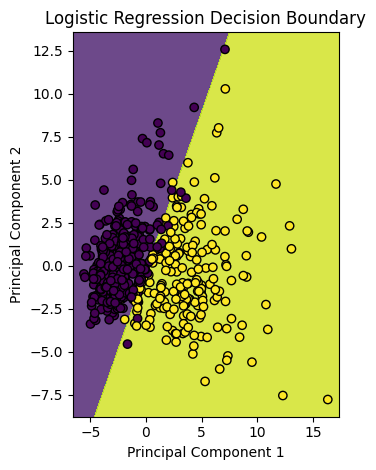

In [127]:
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_log_reg, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()